In [3]:
import pandas as pd
import numpy as np

In [7]:
df_diabetes = pd.read_csv("/Users/manuelrodriguezsutil/Developer/health-risk/kaggle-datasets/diabetes.csv")

In [9]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
bounds = {
    "Glucose": (50, 250),
    "BloodPressure": (40, 140),
    "SkinThickness": (5, 60),
    "Insulin": (15, 500),
    "BMI": (10, 60),
}

In [15]:
for col, (low, high) in bounds.items():
    df_diabetes.loc[(df_diabetes[col] < low) | (df_diabetes[col] > high), col] = np.nan

In [17]:
df_diabetes.fillna(df_diabetes.median(numeric_only=True), inplace=True)

In [19]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.751302,72.602865,28.972656,133.50651,32.409896,0.471876,33.240885,0.348958
std,3.369578,30.309174,11.704860,8.330715,67.87159,6.760263,0.331329,11.760232,0.476951
min,0.000000,56.000000,40.000000,7.000000,15.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,122.00000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,122.00000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,122.00000,36.525000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,495.00000,59.400000,2.420000,81.000000,1.000000


In [29]:
diabetes_features = ["Pregnancies",
                     "Glucose",
                     "BloodPressure",
                     "SkinThickness",
                     "Insulin",
                     "BMI",
                     "DiabetesPedigreeFunction",
                     "Age"]

In [31]:
target = "Outcome"

In [36]:
X = df_diabetes[diabetes_features]
y = df_diabetes[target]

In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [56]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6948051948051948
ROC AUC: 0.8072222222222222
Confusion Matrix:
 [[81 19]
 [28 26]]


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

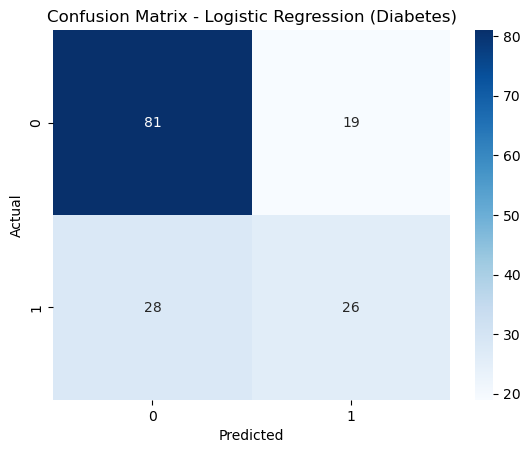

In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Diabetes)")
plt.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/diabetes/confusion_matrix.png", dpi=300)
plt.show()